In [219]:
import pandas as pd

# Load data from attached CSV file
df = pd.read_csv('swiggy.csv')

# Display first 5 rows
display(df.head(5))

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,132295,Chinese Hut,Akola,3.7,50+ ratings,NaN,Chinese,2.15E+13,https://www.swiggy.com/restaurants/chinese-hut...,"Chinese Hut, Sindhi Colony, Akola, Maharashtra...",Menu/132295.json
1,134728,Zamzam Family Restaurant,Akola,3.2,50+ ratings,NaN,"Indian,Biryani",2.15E+13,https://www.swiggy.com/restaurants/zamzam-fami...,"Zamzam Family Restaurant, Subhash Chowk,Red Cr...",Menu/134728.json
2,131745,Anvita Veg Restaurant,Beed,3.7,100+ ratings,NaN,"North Indian,South Indian",1.15E+13,https://www.swiggy.com/restaurants/anvita-veg-...,"Anvita Veg Restaurant, Jalna road Beed",Menu/131745.json
3,132958,Bansi Pav bhaji,Beed,3.6,100+ ratings,NaN,Indian,2.15E+13,https://www.swiggy.com/restaurants/bansi-pav-b...,"Bansi Pav bhaji, Sathe Chowk",Menu/132958.json
4,131755,Sai Prasad Family Restaurant,Beed,3.8,20+ ratings,NaN,"Chinese,North Indian",1.15E+13,https://www.swiggy.com/restaurants/sai-prasad-...,"Sai Prasad Family Restaurant, Mane Complex",Menu/131755.json


In [220]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB
None


In [221]:
# List of columns to drop
columns_to_drop = ['id', 'lic_no', 'link', 'address', 'menu']

# Drop the columns inplace
df.drop(columns=columns_to_drop, inplace=True)

# Verify columns dropped
print(df.columns)

Index(['name', 'city', 'rating', 'rating_count', 'cost', 'cuisine'], dtype='object')


In [222]:
display(df)

,name,city,rating,rating_count,cost,cuisine
0,Chinese Hut,Akola,3.7,50+ ratings,NaN,Chinese
1,Zamzam Family Restaurant,Akola,3.2,50+ ratings,NaN,"Indian,Biryani"
2,Anvita Veg Restaurant,Beed,3.7,100+ ratings,NaN,"North Indian,South Indian"
3,Bansi Pav bhaji,Beed,3.6,100+ ratings,NaN,Indian
4,Sai Prasad Family Restaurant,Beed,3.8,20+ ratings,NaN,"Chinese,North Indian"
...,...,...,...,...,...,...
148536,Poonam Hotel,Sikar,--,Too Few Ratings,₹ 1,"North Indian,Beverages"
148537,RA FAMILY FOODS,Theni,4,50+ ratings,₹ 1,"Biryani,Chinese"
148538,Suvi Griddles,Tirupur,--,Too Few Ratings,₹ 1,Snacks
148539,Sri Kanaka Durga restaurant,"Governorpet,Vijayawada",--,Too Few Ratings,₹ 1,Snacks


In [223]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates keeping the first occurrence (default behavior)
df.drop_duplicates(keep='first', inplace=True)

# Verify duplicates removed
print(f"DataFrame shape after removing duplicates: {df.shape}")

Number of duplicate rows: 35
DataFrame shape after removing duplicates: (148506, 6)


In [224]:
import numpy as np
df.replace('--', np.nan, inplace=True)

In [225]:
# Check if '--' exists anywhere in the DataFrame
contains_dash = df.isin(['--']).any().any()

if contains_dash:
    print("There are still '--' values in the DataFrame")
else:
    print("No '--' values found in the DataFrame")


No '--' values found in the DataFrame


In [226]:
# Count NaN values in each column
nan_counts = df.isna().sum()

# Print NaN counts per column
print("NaN count per column:")
print(nan_counts)

NaN count per column:
name               61
city                0
rating          87068
rating_count       61
cost              106
cuisine            74
dtype: int64


In [227]:
# Drop rows where any of the specified columns have NaN values
df = df.dropna(subset=['name', 'cost', 'cuisine', 'rating_count'])

# Check the shape after dropping
print(f"Shape after dropping rows with NaN in key columns: {df.shape}")

Shape after dropping rows with NaN in key columns: (148388, 6)


In [228]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Step 1: Calculate average rating per restaurant
restaurant_avg = df.groupby('name')['rating'].mean()

# Fill missing ratings by restaurant average
df['rating'] = df.apply(
    lambda row: restaurant_avg[row['name']] if pd.isna(row['rating']) and row['name'] in restaurant_avg else row['rating'],
    axis=1
)

In [229]:
nan_counts = df.isna().sum()

# Print NaN counts per column
print("NaN count per column:")
print(nan_counts)

NaN count per column:
name                0
city                0
rating          76734
rating_count        0
cost                0
cuisine             0
dtype: int64


In [230]:
# Step 2: Calculate average rating per city + cuisine group
city_cuisine_avg = df.groupby(['city', 'cuisine'])['rating'].mean()

# Fill remaining missing ratings by city + cuisine average
df['rating'] = df.apply(
    lambda row: city_cuisine_avg[(row['city'], row['cuisine'])] if pd.isna(row['rating']) and (row['city'], row['cuisine']) in city_cuisine_avg else row['rating'],
    axis=1
)

In [231]:
nan_counts = df.isna().sum()

# Print NaN counts per column
print("NaN count per column:")
print(nan_counts)

NaN count per column:
name                0
city                0
rating          30665
rating_count        0
cost                0
cuisine             0
dtype: int64


In [232]:
# Convert 'rating_count' to string (if not already) and print unique values
unique_values = df['rating_count'].astype(str).unique()
print(unique_values)

['Too Few Ratings' '20+ ratings' '100+ ratings' '50+ ratings'
 '500+ ratings' '1K+ ratings' '5K+ ratings' '10K+ ratings']


In [233]:
def convert_rating_count(x):
    if x == 'Too Few Ratings' or pd.isna(x):
        return 0
    x = x.replace(' ratings', '').replace('+', '').strip()
    if 'K' in x:
        return int(float(x.replace('K', '')) * 1000)
    else:
        return int(x)

df['rating_count'] = df['rating_count'].apply(convert_rating_count)

In [234]:
unique_values = df['rating_count'].unique()
print(unique_values)

[    0    20   100    50   500  1000  5000 10000]


In [235]:
df = df[df['rating_count'] != 0]
df.shape

(61418, 6)

In [236]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 61418 entries, 143 to 148537
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          61418 non-null  object 
 1   city          61418 non-null  object 
 2   rating        61418 non-null  float64
 3   rating_count  61418 non-null  int64  
 4   cost          61418 non-null  object 
 5   cuisine       61418 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.3+ MB
None


In [237]:
# Clean and convert 'cost' column
df['cost'] = df['cost'].str.replace('₹', '', regex=True).str.strip()
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

In [238]:
# Convert rating and rating_count to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

In [239]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 61418 entries, 143 to 148537
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          61418 non-null  object 
 1   city          61418 non-null  object 
 2   rating        61418 non-null  float64
 3   rating_count  61418 non-null  int64  
 4   cost          60615 non-null  float64
 5   cuisine       61418 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.3+ MB
None


In [240]:
# Remove rows where 'cost' is missing
df = df.dropna(subset=['cost'])

# Check if any null values remain in 'cost'
print(df['cost'].isna().sum())

0


In [241]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 60615 entries, 1857 to 148537
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          60615 non-null  object 
 1   city          60615 non-null  object 
 2   rating        60615 non-null  float64
 3   rating_count  60615 non-null  int64  
 4   cost          60615 non-null  float64
 5   cuisine       60615 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.2+ MB
None


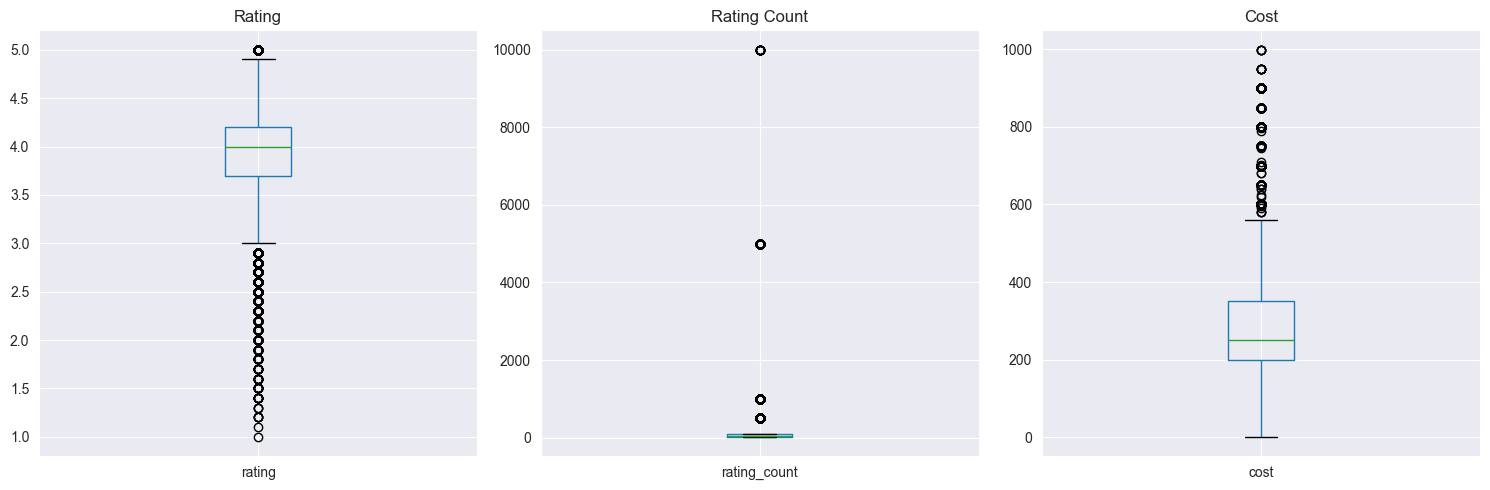

In [242]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
df.boxplot(column='rating', ax=axes[0])
axes[0].set_title('Rating')

df.boxplot(column='rating_count', ax=axes[1])
axes[1].set_title('Rating Count')

df.boxplot(column='cost', ax=axes[2])
axes[2].set_title('Cost')

plt.tight_layout()
plt.show()

In [243]:
display(df)

,name,city,rating,rating_count,cost,cuisine
1857,Aioli Bbq and Grill,"Kammanahalli/Kalyan Nagar,Bangalore",4.0,20,999.0,"Continental,Italian"
1858,Karim's Original From Jama Masjid Delhi-6,"Marathahalli,Bangalore",3.4,100,999.0,"Indian,Kebabs"
1859,46 Ounces Brewgarden,"Electronic City,Bangalore",4.0,20,999.0,"North Indian,Tandoor"
1867,Amys Cafe,"Manikonda,Hyderabad",4.1,100,999.0,"Desserts,Chinese"
1881,FOX IN THE FIELD,"Whitefield,Bangalore",4.3,20,950.0,"Indian,Chinese"
...,...,...,...,...,...,...
148509,Shri jai bakery cakes & Prop,Kanpur,3.3,20,1.0,Bakery
148514,Le Delice Bakers & Restaurant,Kollam,3.8,20,1.0,"Fast Food,Chinese"
148525,Shiv Sagar Veg Restaurant,"Scruz Bandra East,Mumbai",3.8,100,1.0,"South Indian,Snacks"
148535,JAGDAMBA RESTAURANT,"Magarpatta,Pune",2.9,20,1.0,"Indian,Chinese"


In [244]:
df.to_csv('cleaned_data.csv', index=False)

In [245]:
df = pd.read_csv("cleaned_data.csv", index_col=None)
df.columns = df.columns.str.strip()

print("Columns in the dataset:")
for col in df.columns:
    print(f"- {col}")

Columns in the dataset:
- name
- city
- rating
- rating_count
- cost
- cuisine


In [248]:
from sklearn.preprocessing import OneHotEncoder
import pickle

# Step 2: Select categorical columns to encode
categorical_cols = ['city', 'cuisine']

# Step 3: Initialize encoder
encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')

# Step 4: Fit and transform categorical columns
encoded_sparse = encoder.fit_transform(df[categorical_cols])

# Step 5: Create encoded DataFrame
encoded_df = pd.DataFrame.sparse.from_spmatrix(
    encoded_sparse,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df.index
)

# Step 6: Combine with numerical columns
numerical_cols = ['rating', 'rating_count', 'cost']
final_encoded_data = pd.concat([df[['name'] + numerical_cols], encoded_df], axis=1)

# Step 7: Save encoder as pickle
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)
print(" Encoder saved as encoder.pkl")


 Encoder saved as encoder.pkl


In [249]:
# Check data types of all columns
print("\n🔍 Data types of encoded dataset:")
print(final_encoded_data.dtypes)

# Verify that all columns except 'name' are numeric
non_numeric_cols = final_encoded_data.drop(columns=['name']).select_dtypes(exclude=['number']).columns

if len(non_numeric_cols) == 0:
    print("\n All features (except 'name') are numeric.")
else:
    print("\n Non-numeric columns found:", non_numeric_cols.tolist())



🔍 Data types of encoded dataset:
name                                       object
rating                                    float64
rating_count                                int64
cost                                      float64
city_Abids & Koti,Hyderabad    Sparse[float64, 0]
                                      ...        
cuisine_Waffle,Bakery          Sparse[float64, 0]
cuisine_Waffle,Beverages       Sparse[float64, 0]
cuisine_Waffle,Burgers         Sparse[float64, 0]
cuisine_Waffle,Desserts        Sparse[float64, 0]
cuisine_Waffle,Ice Cream       Sparse[float64, 0]
Length: 2379, dtype: object

 All features (except 'name') are numeric.


In [250]:
final_encoded_data.to_csv("encoded_data.csv", index=False)
print("Encoded dataset saved as encoded_data.csv")

Encoded dataset saved as encoded_data.csv


In [251]:
import pandas as pd

# Load both datasets
cleaned_data = pd.read_csv("cleaned_data.csv")
encoded_data = pd.read_csv("encoded_data.csv")

# Check if lengths and indices match
if len(cleaned_data) == len(encoded_data):
    print("Both datasets have the same number of rows:", len(cleaned_data))
else:
    print("Row count mismatch! cleaned_data:", len(cleaned_data), "encoded_data:", len(encoded_data))

# Check for exact index alignment
if cleaned_data.index.equals(encoded_data.index):
    print("Indices match perfectly.")
else:
    print("Indices differ! Resetting indices to ensure consistency...")
    cleaned_data.reset_index(drop=True, inplace=True)
    encoded_data.reset_index(drop=True, inplace=True)
    print("Indices realigned successfully.")

Both datasets have the same number of rows: 60615
Indices match perfectly.


In [265]:
 #Fit Encoder, Scale Numerical Features, and Save Models

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pickle

# Columns
categorical_cols = ['city', 'cuisine']
numerical_cols = ['rating', 'rating_count', 'cost']  # includes rating_count if used

# Fit encoder on categorical columns from cleaned_data
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(cleaned_data[categorical_cols])

# Save encoder
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

# Prepare dataset for scaling: concatenate numerical and encoded categorical features
encoded_cats = encoder.transform(cleaned_data[categorical_cols])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))
numerical_df = cleaned_data[numerical_cols].reset_index(drop=True)
X = pd.concat([numerical_df, encoded_cat_df], axis=1)

# Scale numerical features only (numerical columns)
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(numerical_df)
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_cols)

# Combine scaled numerical with encoded categorical features (unscaled)
X_scaled = pd.concat([scaled_numerical_df, encoded_cat_df], axis=1)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Encoder and scaler fitted and saved.")

Encoder and scaler fitted and saved.


In [266]:
#Train and Save KNN Model
from sklearn.neighbors import NearestNeighbors
import pickle

# Fit KNN model on fully processed data
knn = NearestNeighbors(n_neighbors=6, metric='euclidean')
knn.fit(X_scaled)

# Save KNN model
with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn, f)

print("KNN Model trained and saved.")


KNN Model trained and saved.


In [268]:
#Cleaned recommend_restaurants Function
def recommend_restaurants(city, cuisine, rating, cost):
    # Load encoder, scaler, model, and cleaned_data
    with open("encoder.pkl", "rb") as f:
        encoder = pickle.load(f)
    with open("scaler.pkl", "rb") as f:
        scaler = pickle.load(f)
    with open("knn_model.pkl", "rb") as f:
        knn = pickle.load(f)
    cleaned = pd.read_csv("cleaned_data.csv")

    # Use mean rating_count from cleaned as default for input
    mean_rating_count = cleaned["rating_count"].mean()

    # Prepare user input dataframe
    user_num_df = pd.DataFrame([[rating, mean_rating_count, cost]], columns=['rating', 'rating_count', 'cost'])
    user_cat_df = pd.DataFrame([[city, cuisine]], columns=['city', 'cuisine'])

    print("Input categories:", city, cuisine)
    # Encode categorical features with same encoder
    encoded_cats = encoder.transform(user_cat_df)
    print("Encoded shape:", encoded_cats.shape)
    print("Expected columns:", len(encoder.get_feature_names_out(['city', 'cuisine'])))
    encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(['city', 'cuisine']))

    # Scale numerical features with loaded scaler
    scaled_num = scaler.transform(user_num_df)
    scaled_num_df = pd.DataFrame(scaled_num, columns=['rating', 'rating_count', 'cost'])

    # Combine scaled numerical and encoded categorical features
    user_final = pd.concat([scaled_num_df, encoded_cat_df], axis=1)

    # Find nearest neighbors
    distances, indices = knn.kneighbors(user_final)

    # Exclude first neighbor as it is the input itself, retrieve recommendations from cleaned data
    recommended_indices = indices[0][1:]
    recommendations = cleaned.iloc[recommended_indices]
    recommendations = recommendations[recommendations['city'] == city]
    return recommendations[['name', 'city', 'rating', 'rating_count', 'cost', 'cuisine']]


In [271]:
result = recommend_restaurants(city="Bagalkot", cuisine="Indian", rating=3.8, cost=none)
display(result)

Input categories: Bagalkot Indian
Encoded shape: (1, 2375)
Expected columns: 2375


,name,city,rating,rating_count,cost,cuisine
50464,ZROOZ GRAND RESTAURANT BAKERS,Thiruvananthapuram,3.8,100,200.0,Indian
39583,Krystal kitchen restro and Cafe,Buxar,3.8,100,200.0,Indian
44421,Hot Parathas,"Attapur,Hyderabad",3.8,100,200.0,Indian
44027,Ram ki Bandi,"Manikonda,Hyderabad",3.8,100,200.0,Indian
43687,Mandava Curry Express,"Kothapet & Dilsukhnagar,Hyderabad",3.8,100,200.0,Indian
